In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("malaria.csv")
print(df.describe())


       Temperature          BP     Weight  Level of malaria
count    50.000000   50.000000  50.000000         50.000000
mean     36.434000  106.700000  33.544000     100260.000000
std       1.814411   21.426905  19.797868        407.080196
min      28.700000   72.000000   7.100000     100000.000000
25%      36.100000   90.000000  18.000000     100000.000000
50%      36.600000  104.000000  30.000000     100000.000000
75%      37.000000  120.000000  45.000000     100500.000000
max      38.500000  160.000000  85.000000     101000.000000


<strong><em> DIVIDING THE DATA INTO TEST DATA AND TRAINED DATA</em></strong>

In [2]:
train_data=df.sample(frac=0.7)

test_data=df.drop(train_data.index)

print(train_data.shape)
print(test_data.shape)

(35, 4)
(15, 4)


<strong><em> Column "Level of malaria" is taken as target </em></strong>

In [8]:
train_label=train_data.pop('Level of malaria')

test_label=test_data.pop('Level of malaria')
print(train_label.shape)
print(test_label.shape)

(35,)
(15,)


<strong><em> Membership function for 3 inputs(symptoms) </em></strong>

In [9]:
mf=[[['gaussmf',{'mean':np.mean(np.arange(25,32)),
                "sigma":np.std(np.arange(25,32))}],
    ['gaussmf',{'mean':np.mean(np.arange(30,35)),
                "sigma":np.std(np.arange(30,35))}],
    ['gaussmf',{'mean':np.mean(np.arange(33,39)),
                "sigma":np.std(np.arange(33,39))}]],
   [['gaussmf',{'mean':np.mean(np.arange(70,110)),
                "sigma":np.std(np.arange(70,110))}],
    ['gaussmf',{'mean':np.mean(np.arange(100,140)),
                "sigma":np.std(np.arange(100,140))}],
    ['gaussmf',{'mean':np.mean(np.arange(130,170)),
                "sigma":np.std(np.arange(130,170))}]],
     [['gaussmf',{'mean':np.mean(np.arange(7,40)),
                "sigma":np.std(np.arange(7,40))}],
    ['gaussmf',{'mean':np.mean(np.arange(30,60)),
                "sigma":np.std(np.arange(30,60))}],
    ['gaussmf',{'mean':np.mean(np.arange(50,90)),
                "sigma":np.std(np.arange(50,90))}]]]

<strong><em>Calculating error for 50 epochs</em></strong>

In [10]:
from membership import membershipfunction
mfc = membershipfunction.MemFuncs(mf)

import anfis
anf = anfis.ANFIS(train_data,train_label, mfc)

obtained=anf.train(epochs=50)

Error:  4.225038185829098
Error:  4.224376140312617
Error:  4.223738476181585
Error:  4.223150975229124
Error:  4.222420932321382
Error:  4.221475446417359
Error:  4.220661888382055
Error:  4.2195721501204435
Error:  4.218443110618493
Error:  4.217001884323258
Error:  4.215590820134059
Error:  4.213811434914762
Error:  4.211791169783568
Error:  4.209433776323812
Error:  4.20691489788142
Error:  4.203617006989788
Error:  4.200291304147205
Error:  4.19634403103157
Error:  4.192205974063806
Error:  4.189471550840509
Error:  4.221328216927536
Error:  4.218104622003729
Error:  4.215591802585474
Error:  4.211769629550076
Error:  4.20390675592094
Error:  4.186147616987714
Error:  4.1487354514648365
Error:  4.084305699437115
Error:  3.9805939449900123
Error:  3.822690716403522
Error:  0.9764395598985106
Error:  1.8716134875178045
Error:  1.3613581349567048
Error:  2.256296122265213
Error:  1.9644999495773412
Error:  1.098192162468117
Error:  0.14358357273533282
Error:  0.20652478712467473
Erro

<strong><em> No of rows and columns in training and testing data </em></strong>

In [11]:
train_label=np.reshape(train_label,[1,len(train_label)])
test_label=np.reshape(test_label,[1,len(test_label)])
print(train_label.shape)
print(test_label.shape)

(1, 35)
(1, 15)


C:\Users\Owner\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


<strong><em> Concatenating Obtained output(Obtained level of malaria) in the dataframe </em></strong>

In [12]:
df1=pd.read_csv("malaria.csv")
df2=pd.DataFrame(obtained)
df2.columns=['Obtained Level of malaria']
df=pd.concat([df1,df2], axis=1)

df3=df.dropna()

print(df3)







    Temperature   BP  Weight  Level of malaria  Obtained Level of malaria
0          28.7   72     7.1            100000              101179.872797
1          36.0   80    37.0            100000              101179.872797
2          35.6  120    85.0            100000               99545.000601
3          36.2  160     9.0            100000              101179.872797
4          37.0  120     9.0            100000              100025.785261
5          38.5  127     9.0            101000              100208.671600
6          37.0   80    30.0            101000              100083.394649
7          36.6   90    45.0            100500               99856.805153
8          36.4  120    41.0            100000              100979.935723
9          36.8  100    29.0            100000               99856.805153
10         38.1  130    30.0            100000               99755.727170
11         35.5  100    33.0            100000              100050.329928
12         36.0   90    18.0          

<strong><em>Deciding intensity of malaria from obtained level of malaria</em></strong>

In [13]:


df3['Intensity'] = df3['Obtained Level of malaria'].apply(lambda x: 'LOW' if x <= 100000 else 'HIGH')
print(df3)

    Temperature   BP  Weight  Level of malaria  Obtained Level of malaria  \
0          28.7   72     7.1            100000              101179.872797   
1          36.0   80    37.0            100000              101179.872797   
2          35.6  120    85.0            100000               99545.000601   
3          36.2  160     9.0            100000              101179.872797   
4          37.0  120     9.0            100000              100025.785261   
5          38.5  127     9.0            101000              100208.671600   
6          37.0   80    30.0            101000              100083.394649   
7          36.6   90    45.0            100500               99856.805153   
8          36.4  120    41.0            100000              100979.935723   
9          36.8  100    29.0            100000               99856.805153   
10         38.1  130    30.0            100000               99755.727170   
11         35.5  100    33.0            100000              100050.329928   

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
print(df3[['Level of malaria','Obtained Level of malaria','Intensity']])

    Level of malaria  Obtained Level of malaria Intensity
0             100000              101179.872797      HIGH
1             100000              101179.872797      HIGH
2             100000               99545.000601       LOW
3             100000              101179.872797      HIGH
4             100000              100025.785261      HIGH
5             101000              100208.671600      HIGH
6             101000              100083.394649      HIGH
7             100500               99856.805153       LOW
8             100000              100979.935723      HIGH
9             100000               99856.805153       LOW
10            100000               99755.727170       LOW
11            100000              100050.329928      HIGH
12            100000               99545.000601       LOW
13            100000               99940.430279       LOW
14            100000              100979.935723      HIGH
15            100000              100687.501020      HIGH
16            

<strong><em>Writing the predicted and obtained level of malaria with intensity in new csv file</em></strong>

In [15]:
with open('malaria_2.csv', 'a') as f:
    df3.to_csv(f, header=False)

<strong><em> Calculating mean of error percent </em></strong>

In [18]:
 
error=np.sqrt(((obtained-train_label)**2).mean())
error_per_mean=(((error/train_label)*100).mean())
print(error_per_mean,"%")


0.6312041073483675 %


<strong><em>Relationship between error and epochs </em></strong>

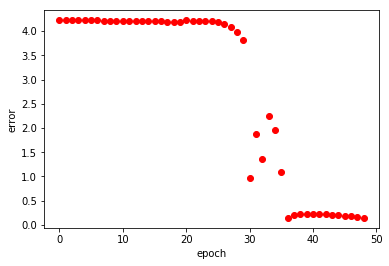

In [19]:
anf.Errors()


<strong><em> Relationship between trained and original output </em></strong>

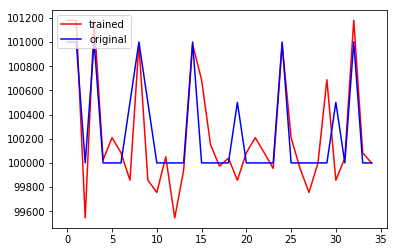

In [20]:
anf.Results()

<strong><em>Scatterplot between predicted and obtained level of malaria in patients</em></strong>

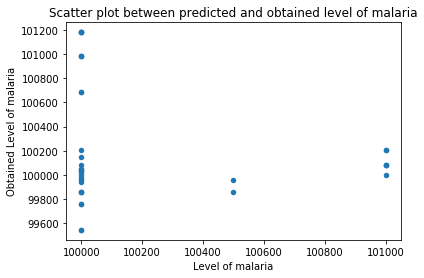

In [21]:
import matplotlib.pyplot as plot
df2 = pd.DataFrame(data=df, columns=['Level of malaria','Obtained Level of malaria'])
df2.plot.scatter(x='Level of malaria', y='Obtained Level of malaria', title= "Scatter plot between predicted and obtained level of malaria");

plot.show(block=True);

<strong><em> Relationship between different symptoms and level of malaria </em></strong>

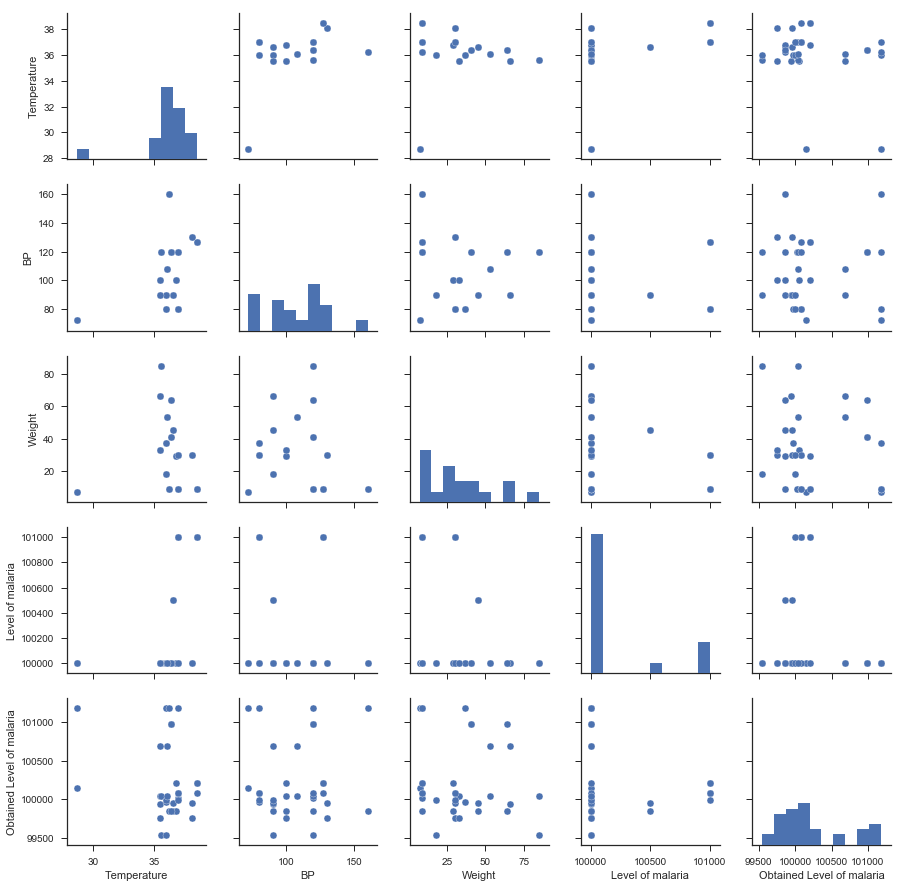

In [22]:
import seaborn as sns
sns.set(style="ticks",color_codes=True)
plt=sns.pairplot(df3)


<strong><em>Relationship between Obtained level of malaria and Intensity </em></strong>

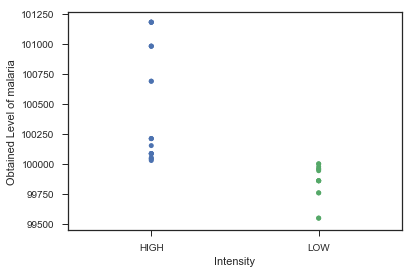

In [23]:
sns.stripplot(x=df3['Intensity'],y=df3['Obtained Level of malaria'])


<strong><em>Kernel Density Estimate plot of Obtained level of malaria in patients </em></strong>

Text(0.5,1,'Level of malaria in patients')

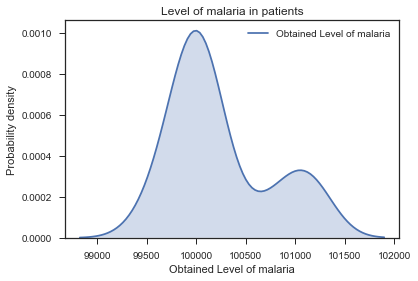

In [24]:
df1=df3['Obtained Level of malaria']
sns.kdeplot(df1, shade=True)
plot.xlabel('Obtained Level of malaria')
plot.ylabel('Probability density')
plot.title('Level of malaria in patients')